In [ ]:
from disentangle.notebooks.naturemethods.splitting_notebooks_utils import (
    get_config_from_saved_predictionfile_NM,
    get_input,
    get_gaussian_poisson_factors,
)
import matplotlib.pyplot as plt
import numpy as np
import os

In [ ]:
from disentangle.core.tiff_reader import load_tiff

# "2507/D32-M3-S0-L8/0": f"/group/jug/ashesh/data/paper_stats/Test_P64_G3-32-32_M50_Sk0/kth_{KTH_SAMPLE}/pred_training_disentangle_2507_D32-M3-S0-L8_0_1.tif",
# "2507/D32-M3-S0-L0/5": f"/group/jug/ashesh/data/paper_stats/Test_P64_G3-32-32_M50_Sk0/kth_{KTH_SAMPLE}/pred_training_disentangle_2507_D32-M3-S0-L0_5_1.tif",
gt_fpath = "/group/jug/ashesh/kth_data/D32/kth0/gt_for_pred_training_disentangle_2507_D32-M3-S0-L8_0_1.tif"
pred_orig_fpath = "/group/jug/ashesh/data/paper_stats/Test_P64_G3-32-32_M50_Sk0/kth_0/pred_training_disentangle_2507_D32-M3-S0-L8_0_1.tif"
pred_denoised_fpath = "/group/jug/ashesh/data/paper_stats/Test_P64_G3-32-32_M50_Sk0/kth_0/pred_training_disentangle_2507_D32-M3-S0-L0_5_1.tif"
pred_noisy_fpath = "/group/jug/ashesh/data/paper_stats/Test_P64_G3-32-32_M50_Sk0/kth_0/pred_training_disentangle_2507_D32-M3-S0-L8_7_1.tif"
gt_denoised_fpath = "/group/jug/ashesh/kth_data/D32/kth0/gt_for_pred_training_disentangle_2507_D32-M3-S0-L8_7_1.tif"
resolution = 45  # nm per pixel

gt = load_tiff(gt_fpath)
pred_orig = load_tiff(pred_orig_fpath)
pred_denoised = load_tiff(pred_denoised_fpath)
pred_noisy = load_tiff(pred_noisy_fpath)
gt_denoised = load_tiff(gt_denoised_fpath)
gt.shape, pred_orig.shape, pred_denoised.shape, pred_noisy.shape, gt_denoised.shape

/localscratch/code/Disentangle/disentangle/core/tiff_reader.py:9: FutureWarning: The plugin infrastructure in `skimage.io` and the parameter `plugin` are deprecated since version 0.25 and will be removed in 0.27 (or later). To avoid this warning, please do not use the parameter `plugin`. Instead, use `imageio` or other I/O packages directly. See also `imread`.
  data = imread(path, plugin='tifffile')
/localscratch/code/Disentangle/disentangle/core/tiff_reader.py:9: FutureWarning: The plugin infrastructure in `skimage.io` and the parameter `plugin` are deprecated since version 0.25 and will be removed in 0.27 (or later). To avoid this warning, please do not use the parameter `plugin`. Instead, use `imageio` or other I/O packages directly. See also `imread`.
  data = imread(path, plugin='tifffile')
/localscratch/code/Disentangle/disentangle/core/tiff_reader.py:9: FutureWarning: The plugin infrastructure in `skimage.io` and the parameter `plugin` are deprecated since version 0.25 and will

((2048, 2048, 3),
 (2048, 2048, 3),
 (2048, 2048, 3),
 (2048, 2048, 3),
 (2048, 2048, 3))

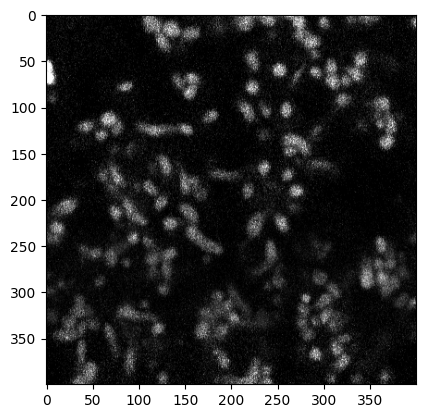

In [ ]:
plt.imshow(gt[:400, :400, 0], cmap="gray")

In [4]:
noisy_cfg = get_config_from_saved_predictionfile_NM(pred_noisy_fpath)
gaussian_sigma, poisson_noise_factor = get_gaussian_poisson_factors(noisy_cfg)
noisy_inp = get_input(gt_denoised, pred_noisy.shape[-1], gaussian_sigma, poisson_noise_factor)[0]
denoised_inp = get_input(gt_denoised, pred_denoised.shape[-1], None, -1)[0]
orig_inp = get_input(gt, pred_orig.shape[-1], None, -1)[0]


Gaussian sigma: 30, Poisson noise factor: 20
Synthetic input
Adding poisson noise with factor 20
Adding gaussian noise with sigma 30
Synthetic input
Synthetic input


In [5]:
noisy_inp.shape

(2048, 2048)

In [30]:
outputdir = "/group/jug/ashesh/naturemethods/hhmi/"
fpath = os.path.join(outputdir, "SNR_HHMI25_8bit.eps")
print(fpath)

/group/jug/ashesh/naturemethods/hhmi/SNR_HHMI25_8bit.eps


<>:32: SyntaxWarning: invalid escape sequence '\s'
<>:32: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_3858/1375318730.py:32: SyntaxWarning: invalid escape sequence '\s'
  ax[3, 0].set_ylabel("Noisy($\sigma=30$, $\lambda=20$)", fontsize=18)
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Saved to /group/jug/ashesh/naturemethods/hhmi/SNR_HHMI25_8bit.eps


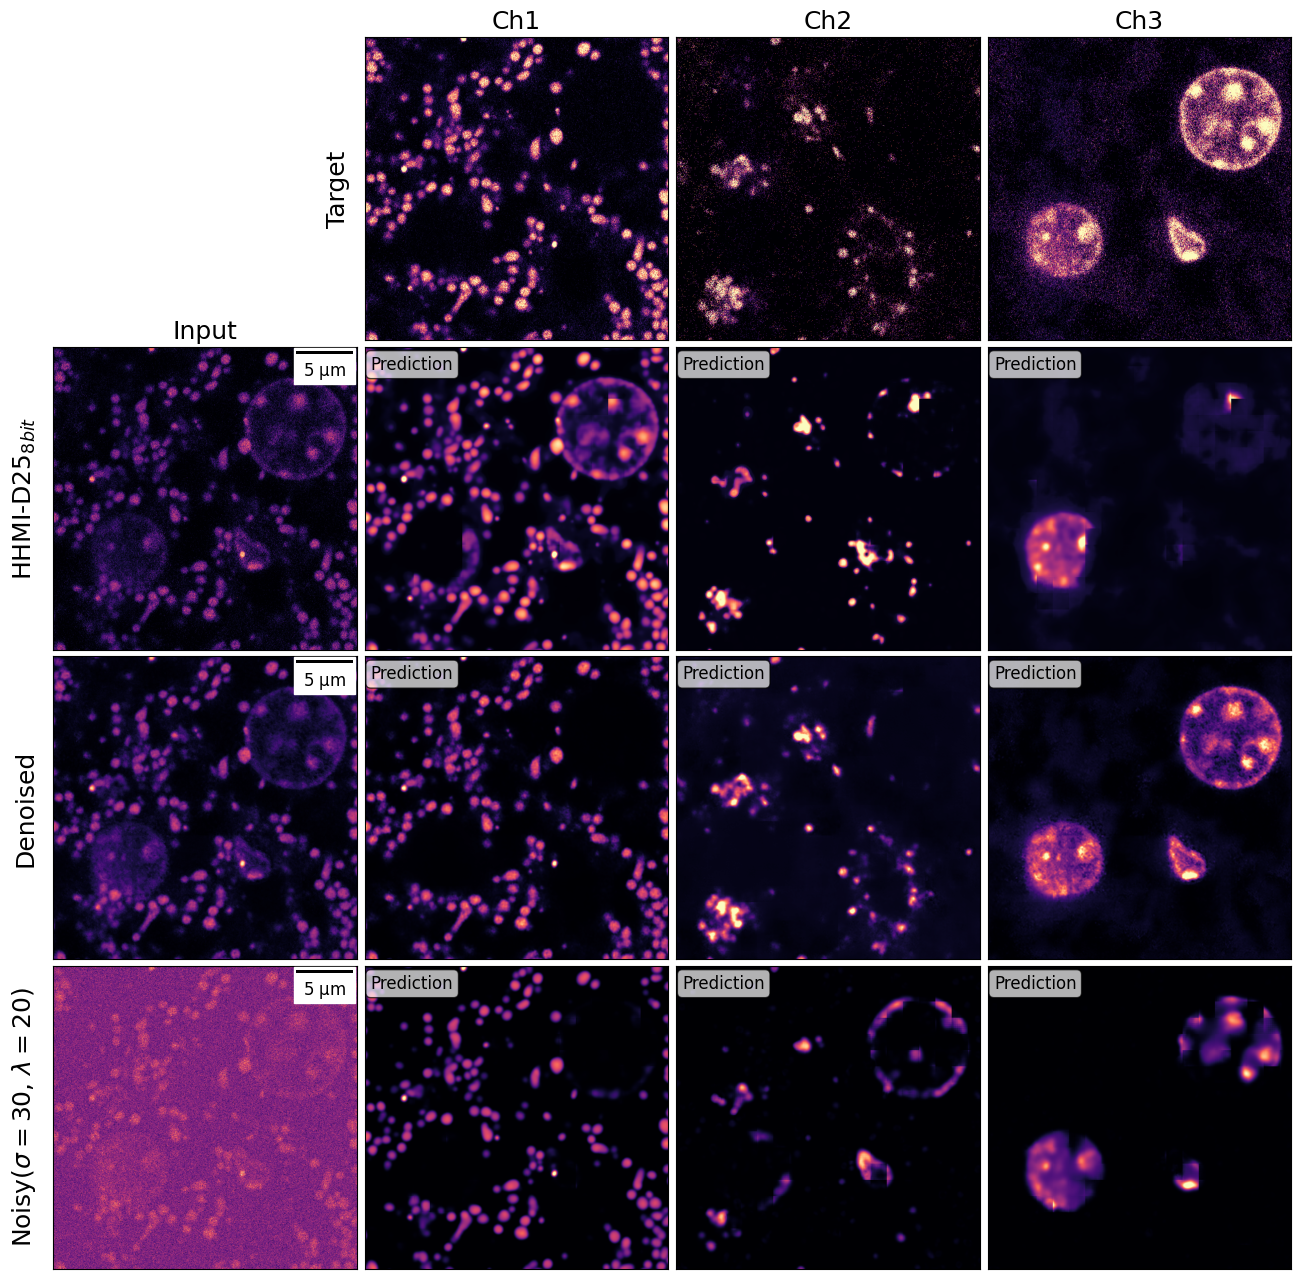

In [32]:
from disentangle.analysis.plot_utils import clean_ax
from matplotlib_scalebar.scalebar import ScaleBar

hs = 1000
ws = 1200
wN = 600
wS = 600
save_to_file = True
_, ax = plt.subplots(figsize=(16, 16), ncols=4, nrows=4)
for i in range(1, 4):
    vmin = np.quantile(gt[..., i - 1], 0.01)
    vmax = np.quantile(gt[..., i - 1], 0.99)

    ax[0, i].imshow(gt[hs : hs + wN, ws : ws + wS, i - 1], cmap="magma", vmin=vmin, vmax=vmax)
    ax[0, i].set_title(f"Ch{i}", fontsize=18)
    ax[1, i].imshow(pred_orig[hs : hs + wN, ws : ws + wS, i - 1], cmap="magma", vmin=vmin, vmax=vmax)
    # ax[1,i].set_title(f'Pred orig {i}')
    ax[2, i].imshow(pred_denoised[hs : hs + wN, ws : ws + wS, i - 1], cmap="magma", vmin=vmin, vmax=vmax)
    # ax[2,i].set_title(f'Pred denoised {i}')
    ax[3, i].imshow(pred_noisy[hs : hs + wN, ws : ws + wS, i - 1], cmap="magma", vmin=vmin, vmax=vmax)

# set [0,0] off
ax[0, 0].axis("off")
ax[1, 0].set_title("Input", fontsize=18)
ax[0, 1].set_ylabel("Target", fontsize=18)
ax[1, 0].imshow(orig_inp[hs : hs + wN, ws : ws + wS], cmap="magma")
ax[2, 0].imshow(denoised_inp[hs : hs + wN, ws : ws + wS], cmap="magma")
ax[3, 0].imshow(noisy_inp[hs : hs + wN, ws : ws + wS], cmap="magma")

ax[1, 0].set_ylabel("HHMI-D25$_{8bit}$", fontsize=18)
ax[2, 0].set_ylabel("Denoised", fontsize=18)
ax[3, 0].set_ylabel("Noisy($\sigma=30$, $\lambda=20$)", fontsize=18)

for i in range(1, 4):
    for j in range(3):
        # add a text with alpha=0.7, stating that it is a prediction.
        ax[1 + j, i].text(
            0.02,
            0.97,  # x, y in axes coordinates
            "Prediction",  # the text you want
            transform=ax[1 + j, i].transAxes,  # so (0,0) is bottom-left, (1,1) is top-right of each subplot
            va="top",
            ha="left",
            fontsize=12,
            color="black",
            bbox=dict(boxstyle="round", facecolor="white", alpha=0.7),
        )

# ax[1,1].set_title('Prediction', fontsize=18)

for i in range(3):
    scalebar = ScaleBar(
        resolution,
        "nm",
        # length_fraction=0.1,
        # box_alpha=0.8,
        frameon=True,
        location="upper right",
        font_properties={"size": 12},
    )

    ax[1 + i, 0].add_artist(scalebar)

clean_ax(ax)
# reduce the space between the subplots
plt.subplots_adjust(wspace=0.02, hspace=0.02)
# plt.tight_layout()
if save_to_file:
    plt.savefig(fpath, dpi=300, bbox_inches="tight")
    print(f"Saved to {fpath}")

In [ ]:
gaussian_sigma, poisson_noise_factor